<a href="https://colab.research.google.com/github/O-orion/Classificao-Compras/blob/main/classificacaoCompras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns

In [105]:
base = pd.read_csv('marketing_campaign.csv', sep='\t')

In [106]:
base.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [107]:
base.shape

(2240, 29)

In [108]:
base['Income'].fillna(base['Income'].mean(), inplace=True)

In [109]:
base.dtypes.value_counts()
base.dtypes[base.dtypes == 'object']

,0
Education,object
Marital_Status,object
Dt_Customer,object


In [110]:
base.drop(['Year_Birth', 'ID', 'Dt_Customer'], axis=1, inplace=True)

In [111]:
base.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [112]:
encoder_edu = OneHotEncoder(sparse_output=False)
encoder_mar = OneHotEncoder(sparse_output=False)

education_encoded = encoder_edu.fit_transform(base[['Education']])
marital_encoded = encoder_mar.fit_transform(base[['Marital_Status']])

education_df = pd.DataFrame(education_encoded, columns=encoder_edu.get_feature_names_out(['Education']))
marital_df = pd.DataFrame(marital_encoded, columns=encoder_mar.get_feature_names_out(['Marital_Status']))

base = pd.concat([base, education_df, marital_df], axis=1)
base.drop(['Education', 'Marital_Status'], axis=1, inplace=True)

In [113]:
base

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [114]:
numeric_columns = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumStorePurchases', 'NumWebVisitsMonth']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns)
    ],
    remainder='passthrough'
)


y = base['Response']
X_transformed = preprocessor.fit_transform(base.drop('Response', axis=1))
X_base = pd.DataFrame(X_transformed, columns=numeric_columns + [col for col in base.columns if col not in numeric_columns + ['Response']])

In [115]:
 X_base = X_base.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [116]:
X_base.shape

(2240, 34)

In [117]:
X_base.dtypes.value_counts()

,count
float64,34


In [118]:
X_base = X_base.values

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)

In [216]:
rede_neural = Sequential([
    Input(shape=(34,)),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

In [217]:
rede_neural.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

In [218]:
rede_neural.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_61 (Dense)                │ (None, 128)            │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,849 (58.00 KB)

 Non-trainable params: 0 (0.00 B)

In [224]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
rede_neural.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9352 - loss: 0.1758 - val_accuracy: 0.8914 - val_loss: 0.2969
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9329 - loss: 0.1759 - val_accuracy: 0.9164 - val_loss: 0.2878
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9380 - loss: 0.1584 - val_accuracy: 0.9109 - val_loss: 0.3090
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9393 - loss: 0.1491 - val_accuracy: 0.8942 - val_loss: 0.2900
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9306 - loss: 0.1481 - val_accuracy: 0.9053 - val_loss: 0.3168
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9352 - loss: 0.1475 - val_accuracy: 0.9081 - val_loss: 0.2952
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9446 - loss: 0.1292 - val_accuracy: 0.9025 - val_loss: 0.3172


In [223]:
loss, acc = rede_neural.evaluate(X_test, y_test)
print(f'Acurácia no conjunto de teste: {acc * 100:.2f}%')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8517 - loss: 0.4177 
Acurácia no conjunto de teste: 85.49%


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Text(70.72222222222221, 0.5, 'True')

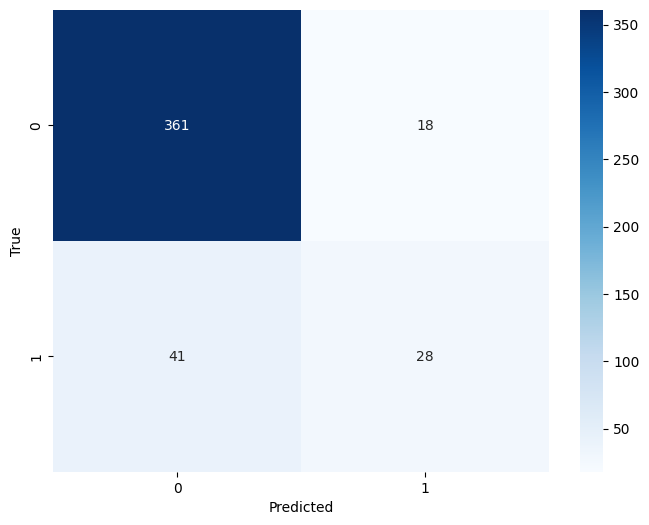

In [221]:
y_pred = rede_neural.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')

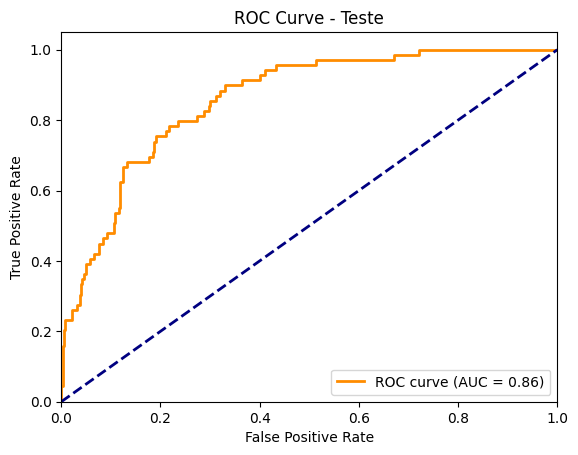

In [213]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
plt.show()

In [214]:
y_pred_prob = rede_neural.predict(X_test, verbose=0)
best_f1 = 0
best_threshold = 0.5
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    y_pred = (y_pred_prob > threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
print(f"Melhor limiar: {best_threshold}, F1: {best_f1:.2f}")

Melhor limiar: 0.2, F1: 0.56


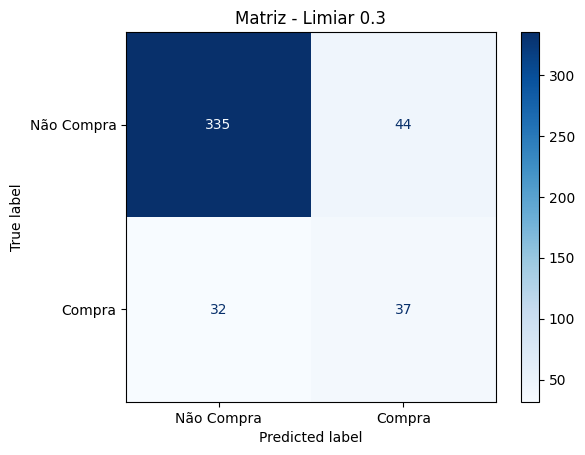

In [215]:
y_pred_03 = (y_pred_prob > 0.3).astype(int)
cm_03 = confusion_matrix(y_test, y_pred_03)
disp_03 = ConfusionMatrixDisplay(confusion_matrix=cm_03, display_labels=['Não Compra', 'Compra'])
disp_03.plot(cmap='Blues')
plt.title('Matriz - Limiar 0.3')
plt.savefig('confusion_matrix_03.png')
plt.show()